# Binary Plots

In [1]:
import poisson_approval as pa
from fractions import Fraction

## XyyToProfile

In Poisson Approval, we call *binary plot* a graphical study of some profiles that are based on two rankings, denoted ``left_ranking`` and ``right_ranking``, in various proportions, and where the utility of the voters for their second candidate also varies. To achieve this, we need a ``XyyToProfile`` object that will generate the profiles:

In [2]:
xyy_to_profile = pa.XyyToProfile(
    pa.ProfileNoisyDiscrete,
    left_ranking='abc',
    right_ranking='cba',
    d_type_fixed_share={('bac', 0.1, 0.01): Fraction(1, 12),
                        ('bac', 0.9, 0.01): Fraction(1, 12)},
    noise=0.01
)

The above syntax defines a function ``xyy_to_profile``  that maps a tuple $(x, y1, y2)$ to a profile defined as:

* The class of profile is ProfileNoisyDiscrete,
* A fixed share 1/12 of voters are of type $(bac, 0.1, 0.01)$, and a fixed share 1/12 of voters are of type $(bac, 0.9, 0.01)$,
* The other voters, i.e. a share 5/6, are distributed between ``left_ranking`` and ``right_ranking``, in respective proportions $1 - x$ and $x$.
* The voters with preference order ``left_ranking`` have a utility $y1$ for their second candidate,
* The voters with preference order ``right_ranking`` have a utility $y2$ for their second candidate.

For example:

In [3]:
xyy_to_profile(x=Fraction(1, 5), y1=0.42, y2=0.51)

<abc 0.42 ± 0.01: 2/3, bac 0.1 ± 0.01: 1/12, bac 0.9 ± 0.01: 1/12, cba 0.51 ± 0.01: 1/6> (Condorcet winner: a)

## Scale

All the plots require two resolution parameters called ``xscale`` and ``yscale``. For example, if ``xscale = yscale = 10``, then the x-axis and the y-axis are divided into cells of diameter 1/10 and the value of the plotted function is computed at the center of each cell. In this tutorial, we define global parameters ``XSCALE`` and ``YSCALE`` and we will use them for all the plots.

In [4]:
XSCALE = 10
YSCALE = 10

## Number of Equilibria

By default, the function ``binary_plot_n_equilibria`` computes the ordinal equilibria, i.e. those where all voters having the same ranking cast the same ballot:

(<Figure size 414x288 with 3 Axes>,
 <poisson_approval.meta_analysis.binary_plots.BinaryAxesSubplotPoisson at 0x1acdb4cbe10>)

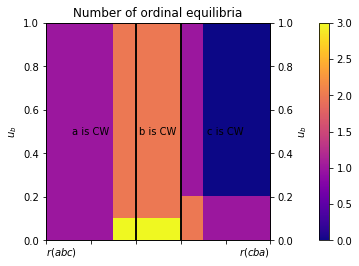

In [5]:
pa.binary_plot_n_equilibria(
    xyy_to_profile,
    xscale=XSCALE, yscale=YSCALE,
    title='Number of ordinal equilibria')

Using the option ``meth``, you can investigate other kinds of equilibria:

(<Figure size 414x288 with 3 Axes>,
 <poisson_approval.meta_analysis.binary_plots.BinaryAxesSubplotPoisson at 0x1acdb7fa2b0>)

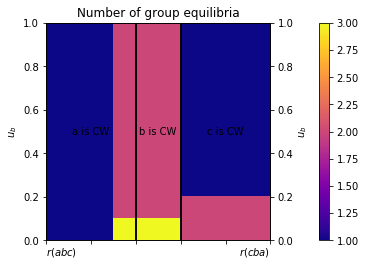

In [6]:
pa.binary_plot_n_equilibria(
    xyy_to_profile,
    xscale=XSCALE, yscale=YSCALE,
    title='Number of group equilibria', 
    meth='analyzed_strategies_group')

Depending on the class of profile, the possible values of the option ``meth`` may be:

* ``analyzed_strategies_ordinal`` (the default),
* ``analyzed_strategies_group``,
* ``analyzed_strategies_pure`` (for ProfileDiscrete only).

## Winners at Equilibrium

The function ``binary_plot_n_equilibria`` works similarly:

(<Figure size 288x288 with 2 Axes>,
 <poisson_approval.meta_analysis.binary_plots.BinaryAxesSubplotPoisson at 0x1acda2f7b70>)

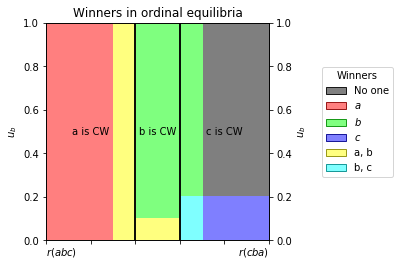

In [7]:
pa.binary_plot_winners_at_equilibrium(
    xyy_to_profile,
    xscale=XSCALE, yscale=YSCALE,
    title='Winners in ordinal equilibria')

(<Figure size 288x288 with 2 Axes>,
 <poisson_approval.meta_analysis.binary_plots.BinaryAxesSubplotPoisson at 0x1acdb884c50>)

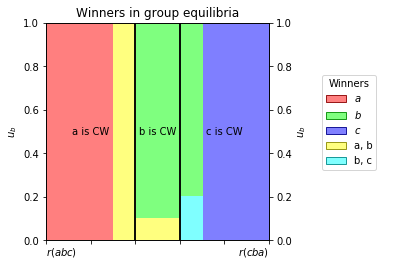

In [8]:
pa.binary_plot_winners_at_equilibrium(
    xyy_to_profile,
    xscale=XSCALE, yscale=YSCALE,
    title='Winners in group equilibria',
    legend_title='Winners', 
    meth='analyzed_strategies_group')

## Winning Frequencies in Fictitious Play or Iterated Voting

By default, the function ``binary_plot_winning_frequencies`` computes the winning frequencies in fictitious play, with an initialization in sincere strategy, and with all update ratios in $1 / (t + 1)$:

(<Figure size 288x288 with 3 Axes>,
 <poisson_approval.meta_analysis.binary_plots.BinaryAxesSubplotPoisson at 0x1acdbad4eb8>)

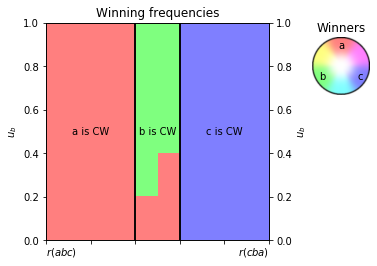

In [9]:
pa.binary_plot_winning_frequencies(
    xyy_to_profile,
    xscale=XSCALE, yscale=YSCALE,
    n_max_episodes=100)

You can change this behavior with the optional parameters of the function:

(<Figure size 288x288 with 3 Axes>,
 <poisson_approval.meta_analysis.binary_plots.BinaryAxesSubplotPoisson at 0x1acdb394128>)

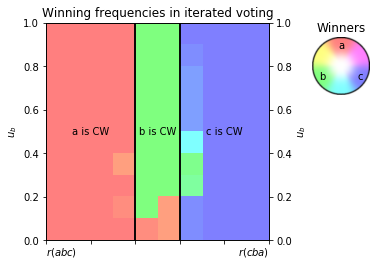

In [10]:
pa.binary_plot_winning_frequencies(
    xyy_to_profile,
    xscale=XSCALE, yscale=YSCALE,
    meth='iterated_voting',
    init='random',
    samples_per_point=10, 
    perception_update_ratio=1,
    ballot_update_ratio=1,
    winning_frequency_update_ratio=pa.one_over_t_plus_one,
    n_max_episodes=100, 
    title='Winning frequencies in iterated voting',
    legend_title='Winners'
)

## Advanced Intensity Heat Maps

First, define a function that maps a point $(x, y1, y2)$ to a number:

In [11]:
def f(x, y1, y2):
    return (x**2 + y1) / (y2 + 1)

Then use the method ``heatmap_intensity``:

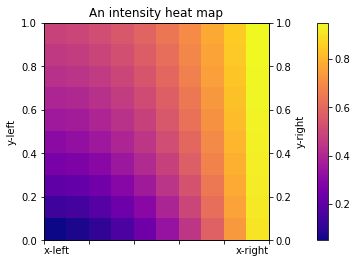

In [12]:
figure, tax = pa.binary_figure(xscale=XSCALE, yscale=YSCALE)
tax.heatmap_intensity(f, 
                      x_left_label='x-left',
                      x_right_label='x-right',
                      y_left_label='y-left',
                      y_right_label='y-right')
tax.set_title('An intensity heat map')

## Advanced Candidate Heat Maps

First, define a function that maps a point $(x, y1, y2)$ to a array of size 3 (associated with candidates a, b, c):

In [13]:
def g(x, y1, y2):
    a = x**.5
    b = y1**2
    c = 1 - a - b
    return [a, b, c]

Then use the method ``heatmap_candidates``:

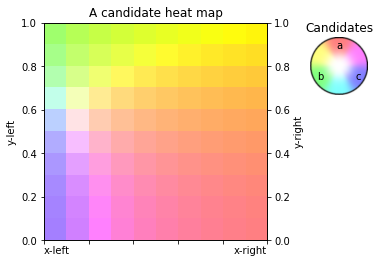

In [14]:
figure, tax = pa.binary_figure(xscale=XSCALE, yscale=YSCALE)
tax.heatmap_candidates(g, 
                       x_left_label='x-left',
                       x_right_label='x-right',
                       y_left_label='y-left',
                       y_right_label='y-right',
                       legend_title='Candidates',
                       legend_style='palette')
tax.set_title('A candidate heat map')